In [1]:
#https://www.learnopencv.com/head-pose-estimation-using-opencv-and-dlib/
import cv2, os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

0


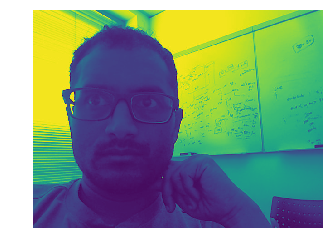

In [61]:
    path = os.getcwd()
    img = cv2.imread(os.path.join(path, 'data/training/64.jpeg'));
    #img = cv2.imread(os.path.join(path, 'data/1.jpeg'));
   
    #face_cascade = cv2.CascadeClassifier(os.path.join(path,'data/haarcascades/haarcascade_frontalface_default.xml'))
    face_cascade = cv2.CascadeClassifier(os.path.join(path,'data/haarcascades/haarcascade_frontalcatface.xml'))
    eye_cascade = cv2.CascadeClassifier(os.path.join(path, 'data/haarcascades/haarcascade_eye.xml'))
    #img = cv2.imread('/home/karthik/Downloads/obama1.jpeg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #plt.imshow(img)
    #plt.show()
    faces = face_cascade.detectMultiScale(gray, 1.3, 5) 
    print(len(faces))
    for (x,y,w,h) in faces:
        print('found')
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.imshow(gray)
    plt.show()

In [4]:
cascadePath = os.path.join(path, "data/haarcascades/haarcascade_frontalface_default.xml")
faceCascade = cv2.CascadeClassifier(cascadePath);
recognizer = cv2.face.createLBPHFaceRecognizer()

In [5]:
def get_images_and_labels(path):
    # Append all the absolute image paths in a list image_paths
    # We will not read the image with the .sad extension in the training set
    # Rather, we will use them to test our accuracy of the training
    image_paths = [os.path.join(path, f) for f in os.listdir(path) if not f.endswith('.sad')]
    # images will contains face images
    images = []
    # labels will contains the label that is assigned to the image
    labels = []
    for image_path in image_paths:
        # Read the image and convert to grayscale
        image_pil = Image.open(image_path).convert('L')
        # Convert the image format into numpy array
        image = np.array(image_pil, 'uint8')
        # Get the label of the image
        nbr = int(os.path.split(image_path)[1].split(".")[0].replace("subject", ""))
        # Detect the face in the image
        faces = faceCascade.detectMultiScale(image)
        # If face is detected, append the face to images and the label to labels
        for (x, y, w, h) in faces:
            images.append(image[y: y + h, x: x + w])
            labels.append(nbr)
            #cv2.imshow("Adding faces to traning set...", image[y: y + h, x: x + w])
            #cv2.waitKey(50)
    # return the images list and labels list
    return images, labels
#http://vision.ucsd.edu/content/yale-face-database

In [6]:
# Path to the Yale Dataset
img_path = os.path.join(path, 'data/yalefaces/') 
# The folder yalefaces is in the same folder as this python script
# Call the get_images_and_labels function and get the face images and the 
# corresponding labels
images, labels = get_images_and_labels(img_path)
#cv2.destroyAllWindows()

In [7]:
recognizer.train(images, np.array(labels))

5 is Correctly Recognized with confidence 33.644262656412785


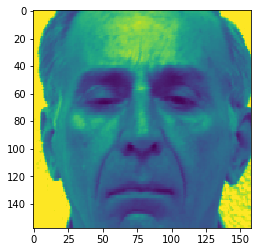

3 is Correctly Recognized with confidence 43.47629904102858


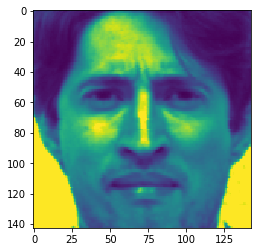

1 is Correctly Recognized with confidence 39.651251744453255


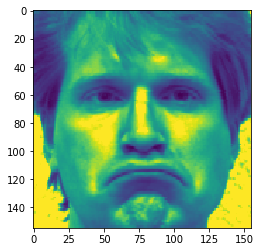

2 is Correctly Recognized with confidence 35.49467125513262


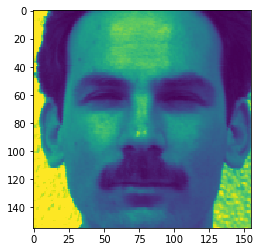

4 is Correctly Recognized with confidence 0.0


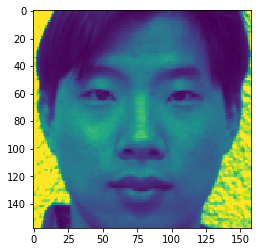

In [9]:
# Append the images with the extension .sad into image_paths
image_paths = [os.path.join(img_path, f) for f in os.listdir(img_path) if f.endswith('.sad')]
for image_path in image_paths:
    predict_image_pil = Image.open(image_path).convert('L')
    predict_image = np.array(predict_image_pil, 'uint8')
    faces = faceCascade.detectMultiScale(predict_image)
    for (x, y, w, h) in faces:
        result = cv2.face.MinDistancePredictCollector()
        recognizer.predict(predict_image[y: y + h, x: x + w],result, 0)
        nbr_predicted = result.getLabel()
        conf = result.getDist()

        nbr_actual = int(os.path.split(image_path)[1].split(".")[0].replace("subject", ""))
        if nbr_actual == nbr_predicted:
            print ("{} is Correctly Recognized with confidence {}".format(nbr_actual, conf))
        else:
            print ("{} is Incorrectly Recognized as {}".format(nbr_actual, nbr_predicted))

        #plt.imshow(predict_image_src)
        plt.imshow(predict_image[y: y + h, x: x + w])
        plt.show()    
    #cv2.imshow("Recognizing Face", predict_image[y: y + h, x: x + w])
    #cv2.waitKey(1000)

In [16]:
cap = cv2.VideoCapture(1)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    print(ret)
    
    if ret == False:
        break
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()

False
